## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.count)
print(study_results.count)

# Combine the data into a single dataset
research_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
research_data_df.head()

<bound method DataFrame.count of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>
<bound method DataFrame.count of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of unique mice in combined dataframe.
mice_count = research_data_df["Mouse ID"].nunique()
print(f"Total Mice Count: {mice_count}")

Total Mice Count: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data_df = research_data_df[research_data_df.duplicated(["Mouse ID","Timepoint"], keep=False)]

# Display duplicate Mouse ID and Timepoint data
duplicate_data_df[["Mouse ID","Timepoint"]]

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Displaying all data for Duplicate Mouse ID. 
duplicate_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID and Timepoint.
clean_data_df = research_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Displaying cleanded data preview
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_data_df["Mouse ID"].nunique()
print(f"Total Mice Count after clean up: {mice_count}")

Total Mice Count after clean up: 249


## Summary Statistics

In [7]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculating mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen. 
research_summary_mean = research_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].to_frame(name="Mean")
research_summary_median = research_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"].to_frame(name="Median")
research_summary_var = research_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].to_frame(name="Variance")
research_summary_std = research_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].to_frame(name="Standard Deviation")
research_summary_sem = research_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].to_frame(name="SEM")

# Combining the results into a single summary dataframe.
research_summary = pd.concat([research_summary_mean,
                              research_summary_median,
                              research_summary_var,
                              research_summary_std,
                              research_summary_sem], 
                             axis=1)

# Displaying the summary statistics
research_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, producing the same summary statistics in a single line
research_summary_df = research_data_df[["Drug Regimen","Tumor Volume (mm3)"]] \
                    .groupby("Drug Regimen") \
                    .agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})

# Displaying the summary statistics
research_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

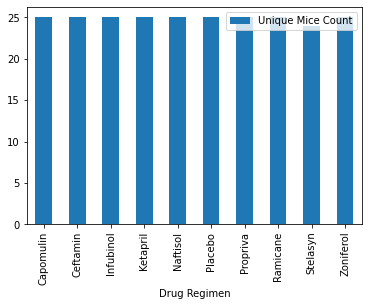

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimen_df = research_data_df.groupby(["Drug Regimen"]).nunique()["Mouse ID"].to_frame(name="Unique Mice Count")
drug_regimen_bar = drug_regimen_df.plot(kind="bar", y="Unique Mice Count")

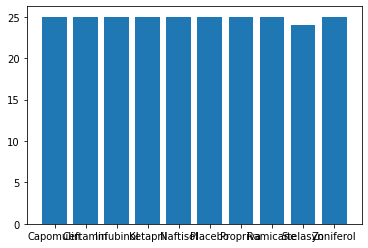

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(drug_regimen_df.index,drug_regimen_df["Unique Mice Count"])
plt.show()

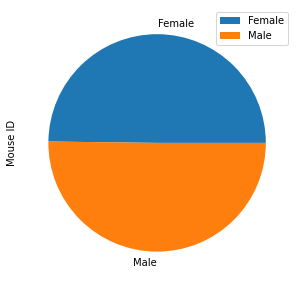

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_df = research_data_df.groupby(["Sex"]).nunique()["Mouse ID"].to_frame()
mice_pie_p = mice_df.plot(kind="pie", y="Mouse ID", figsize=(5,5))

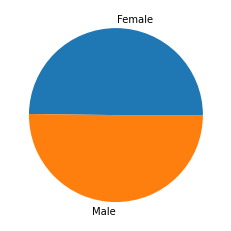

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_df["Mouse ID"], labels=mice_df.index)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastest_entry = research_data_df.groupby(["Drug Regimen","Mouse ID"]).max()["Timepoint"].to_frame()
#lastest_entry

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
latest_tumer = lastest_entry.merge(research_data_df, on=["Drug Regimen","Mouse ID","Timepoint"])
#latest_tumer

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_result = latest_tumer[latest_tumer["Drug Regimen"].isin(regimens)]
regimen_result_df = regimen_result[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
regimen_result_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
195,Ramicane,s508,30.276232
196,Ramicane,u196,40.667713
197,Ramicane,w678,43.166373
198,Ramicane,y449,44.183451


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

#list_tumors 
list_tumors = []
outlier_tumor_df = pd.DataFrame()
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimens:
    tumor_volume = regimen_result_df[regimen_result_df["Drug Regimen"]==regimen]["Tumor Volume (mm3)"]
    regimen_q = tumor_volume.quantile([.25,.5,.75])
    lower_q = regimen_q[0.25]
    median_q = regimen_q[0.5]
    upper_q = regimen_q[0.75]
    regimen_iqr = upper_q-lower_q
    lower_bound = lower_q - (1.5*regimen_iqr)
    upper_bound = upper_q + (1.5*regimen_iqr)
    print(f"The lower quartile of the Tumor Volume for {regimen} is: {lower_q}")
    print(f"The upper quartile of the Tumor Volume for {regimen} is: {upper_q}")
    print(f"The inter quartile range of the Tumor Volume for {regimen} is: {regimen_iqr}")
    print(f"The median of the Tumor Volume for {regimen} is: {median_q}")  
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
       
    # add subset 
    list_tumors.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    if len(outlier_tumor_df)==0:
        outlier_tumor_df = regimen_result_df[(regimen_result_df["Drug Regimen"]==regimen) &
                                        ((regimen_result_df["Tumor Volume (mm3)"] > upper_bound) | \
                                        (regimen_result_df["Tumor Volume (mm3)"] < lower_bound))]
    else:
        outlier_tumor_df.append(regimen_result_df[(regimen_result_df["Drug Regimen"]==regimen) &
                                        ((regimen_result_df["Tumor Volume (mm3)"] > upper_bound) | \
                                        (regimen_result_df["Tumor Volume (mm3)"] < lower_bound))])
outlier_tumor_df

The lower quartile of the Tumor Volume for Capomulin is: 32.37735684
The upper quartile of the Tumor Volume for Capomulin is: 40.1592203
The inter quartile range of the Tumor Volume for Capomulin is: 7.781863460000004
The median of the Tumor Volume for Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of the Tumor Volume for Ramicane is: 31.56046955
The upper quartile of the Tumor Volume for Ramicane is: 40.65900627
The inter quartile range of the Tumor Volume for Ramicane is: 9.098536719999998
The median of the Tumor Volume for Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of the Tumor Volume for Infubinol is: 54.04860769
The upper quartile of the Tumor Volume for Infubinol is: 65.52574285
The inter quartile range of the Tumor Volume for Infubinol is: 11.477135160000003
The median of the Tumor Volum

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
55,Infubinol,c326,36.321346


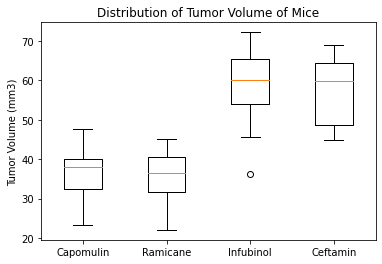

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots()
axs.set_title("Distribution of Tumor Volume of Mice")
axs.set_ylabel("Tumor Volume (mm3)")
axs.boxplot(list_tumors)
plt.xticks([1,2,3,4],regimens)
plt.show()

## Line and Scatter Plots

s710


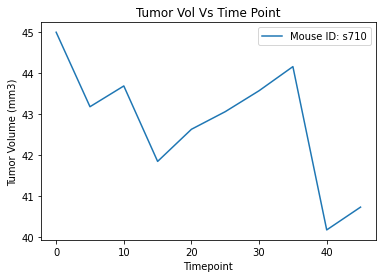

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = research_data_df[research_data_df["Drug Regimen"]=="Capomulin"] \
                                    [["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
sample_mouse = capomulin_df.sample(n=1)["Mouse ID"].iloc[0]
print(sample_mouse)
x_axis = capomulin_df[capomulin_df["Mouse ID"]==sample_mouse]["Timepoint"]
y_axis = capomulin_df[capomulin_df["Mouse ID"]==sample_mouse]["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, label=f"Mouse ID: {sample_mouse}")

plt.title("Tumor Vol Vs Time Point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.show()

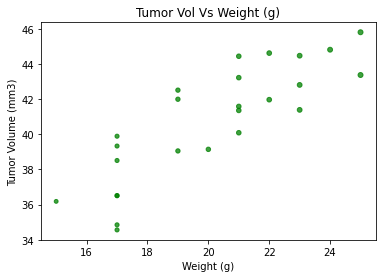

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_sc_df = research_data_df[research_data_df["Drug Regimen"]=="Capomulin"] \
                                    .groupby(["Mouse ID","Weight (g)"], as_index=False)["Tumor Volume (mm3)"] \
                                    .mean()

weight = capomulin_sc_df["Weight (g)"]
tumor = capomulin_sc_df["Tumor Volume (mm3)"]

plt.scatter(weight, tumor, marker="o", facecolors="green", 
            s=x_axis, alpha=0.75)

plt.title("Tumor Vol Vs Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coe = st.pearsonr(weight,tumor)
print(f"The correlation between the Weight and Tumor Volume for the Capomulin regimen is {round(correlation_coe[0],2)}")

The correlation between the Weight and Tumor Volume for the Capomulin regimen is 0.84


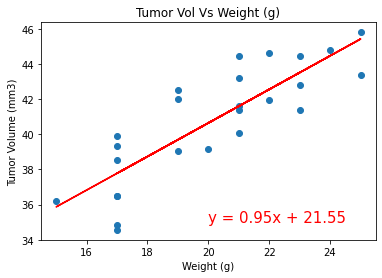

In [36]:
x_axis = weight
y_axis = tumor
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title("Tumor Vol Vs Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()